## 1.1 Loading an image

In [2]:
import img_reader as rd
import numpy as np

### Testing our custom image reader

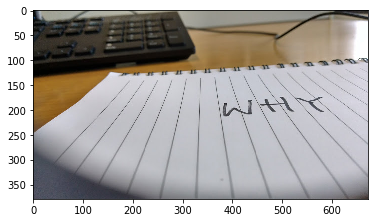

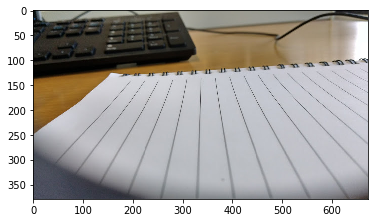

In [45]:
img = rd.read_img("images/01-why1.jpg")
rd.show_img(img)
img2 = rd.read_img("images/01-why2.jpg")
rd.show_img(img2)

### Goal: Filter out the text
Approach: Substract second from first image

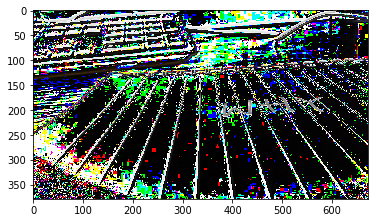

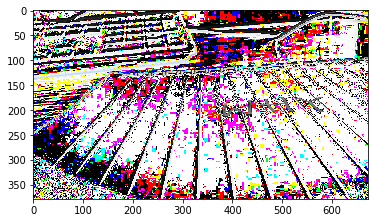

In [46]:
img_diff = img - img2
rd.show_img(img_diff)
img_diff = img2 - img
rd.show_img(img_diff)

### Question: Why does it not work?
Guess: light changes marginally? camera a bit shaky?

### Attempt: Record two images of the same scence and substract.

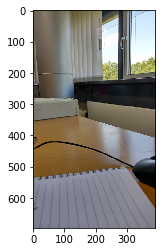

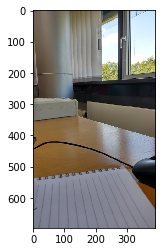

In [5]:
# img3 = rd.read_img("images/01-why3.jpg")
img3 = rd.read_img("images/01-why5.jpg")
rd.show_img(img3)
# img4 = rd.read_img("images/01-why4.jpg")
img4 = rd.read_img("images/01-why6.jpg")
rd.show_img(img4)

### Result of substraction should be almost completely black

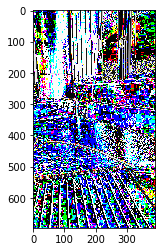

In [6]:
img_diff2 = img3 - img4
rd.show_img(img_diff2)

### Normalize values
Shift all values to black when they're above a certain threshold <br>
Same for white

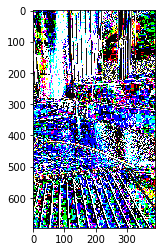

In [8]:
threshold_black = 150
for row in range(0, len(img_diff2)):
    for col in range(0, len(img_diff2[0])):
        if img_diff2[row,col,0] > threshold_black \
            and img_diff2[row,col,1] > threshold_black \
            and img_diff2[row,col,2] > threshold_black:
            img_diff2[row, col] = [255,255,255]
rd.show_img(img_diff2)

### The mistake is not due to the threshold...
Light has a strong effect on the outcome <br>


### What about dimly lit photos?

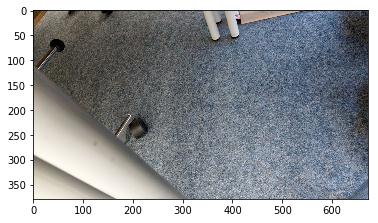

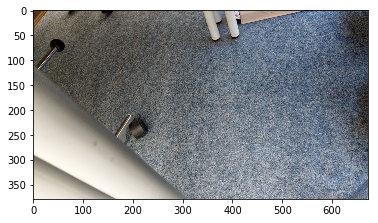

In [35]:
img = rd.read_img("images/01-dim1.jpg")
rd.show_img(img)
img2 = rd.read_img("images/01-dim2.jpg")
rd.show_img(img2)

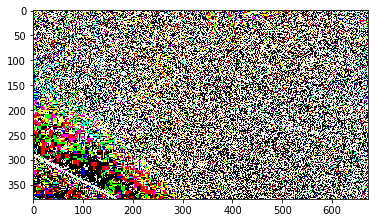

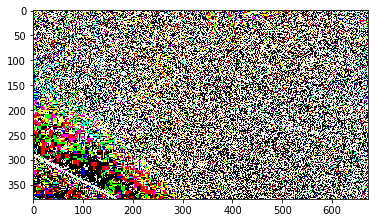

In [38]:
img_diff = np.absolute(img - img2)
img_diff_abs = np.absolute(img - img2)

rd.show_img(img_diff)
rd.show_img(img_diff_abs)

### What if we normalize the pixel values?

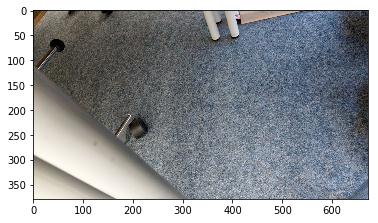

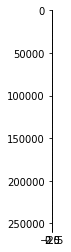

In [34]:
rd.show_img(img)

def normalize(img):
    img_test = np.reshape(img, (len(img)*len(img[0]), -1))
    mean_pixel = np.mean(img_test, axis=0)
    std_dev = np.std(img_test, axis=0)
    temp = (img_test - mean_pixel)/std_dev
    return (temp, mean_pixel, std_dev)

norm_i1, mean_i1, std_dev1 = normalize(img)
norm_i2, mean_i2, std_dev2 = normalize(img2)
norm_diff = norm_i1 - norm_i2
norm_diff = norm_diff * (std_dev1 + std_dev2)/2
norm_diff = norm_diff + (mean_i1 + mean_i2)/2
norm_diff = np.reshape(norm_diff, (len(img), len(img[0]), -1))
norm_diff = np.rint(norm_i1)
rd.show_img(norm_diff)



### Learnings: This approach doesn't lead far. Test with screenshots

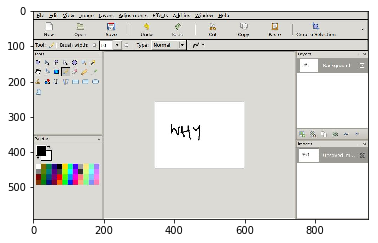

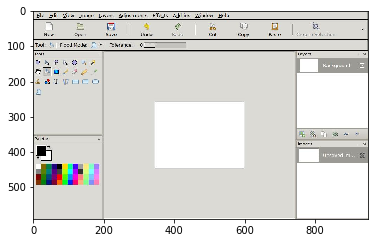

In [41]:
img = rd.read_img("images/01-screen1.jpg")
rd.show_img(img)
img2 = rd.read_img("images/01-screen2.jpg")
rd.show_img(img2)

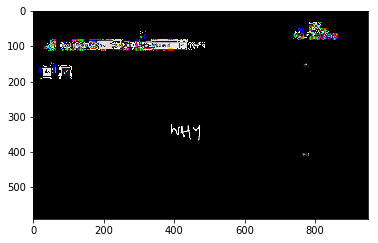

In [43]:
rd.show_img(img2 - img)